# Real Time Fake News Detection


## Problem Statement
### What is Fake News?
Fake or misleading information that is reported as news is called fake news. A common goal of fake news is to harm someone or somethings reputation to profit through advertising.
In the era of information overload, the prevalence of fake news has become a significant concern, leading to widespread misinformation and its potential impact on society, politics, and public perception. 

This project aims to develop an effective and efficient data science solution for fake news detection, leveraging machine learning techniques to classify news articles as either genuine or fake with high accuracy and reliability.

### Dataset: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

### Dataset Description
-	**Title:** Provides a concise summary or headline that captures the main topic or focus of the article. <br>
-	**Text:** Contains the detailed information, facts, arguments, opinions, or narratives indicated by the title.<br>
-	**Subject:** Categorizes the news article into a specific topic or domain such as Government news,politics-news, world-news<br>
-	**Date:** Indicates the specific day, month, and year when the news article was published


### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

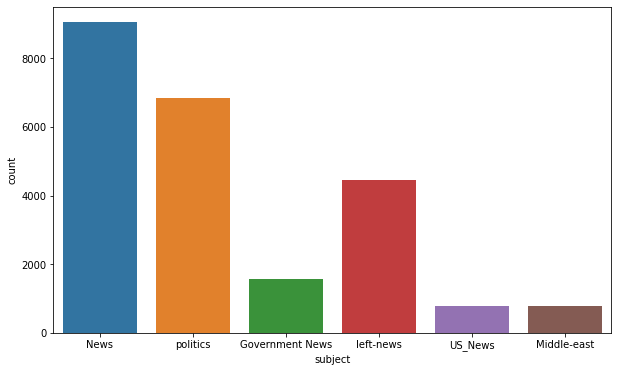

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject', data=df_fake)

In [6]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df_true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

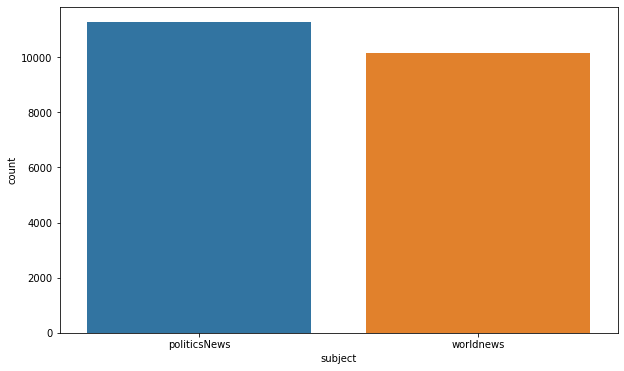

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject', data=df_true)

### Data Cleaning and Preparation 

#### Inserting a column "class" as target feature

In [9]:
df_fake["class"] = 0
df_true["class"] = 1

In [10]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

#### Removing last 10 rows for manual testing 

In [11]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)    
    
df_true_manual_testing = df_true.tail(10)


In [12]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [13]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [14]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [16]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("testing.csv")

#### Merging True and Fake Dataframes 

In [17]:
data = pd.concat([df_fake, df_true],axis=0)
data

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [18]:
data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [19]:
data.shape

(44898, 5)

#### Random Shuffling the dataframe 

In [20]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [21]:
data.head()

,title,text,subject,date,class
0,China jails former Tianjin mayor for 12 years ...,BEIJING (Reuters) - China on Monday jailed for...,worldnews,"September 25, 2017",1
1,Trump’s HHS Secretary Argues That Insurers SH...,The debate about health care has lead to some ...,News,"March 16, 2017",0
2,Trump tries to soothe Polish-Americans' concer...,CHICAGO (Reuters) - Republican presidential no...,politicsNews,"September 28, 2016",1
3,BREAKING: YOU’RE FIRED! FBI DIRECTOR JAMES COM...,Wow! This is clearly something the White House...,politics,"May 9, 2017",0
4,Morning Joe Hilariously Trashes Sarah Palin’s...,Sarah Palin must have been on some powerful dr...,News,"April 4, 2016",0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


#### Droping columns which are not required 

In [23]:
df = data.drop(["title","date"], axis = 1)

In [24]:
df.columns

Index(['text', 'subject', 'class'], dtype='object')

In [25]:
df.isnull().sum()

text       0
subject    0
class      0
dtype: int64

### Removing Duplicate Values 

In [26]:
df = pd.DataFrame(df)

num_duplicates = df.duplicated().sum()

print("Number of duplicate values:", num_duplicates)


Number of duplicate values: 855


In [27]:
df = pd.DataFrame(df)

df_no_duplicates = df.drop_duplicates()
df.drop_duplicates(inplace=True)

print("DataFrame without duplicates:")
print(df_no_duplicates)


DataFrame without duplicates:
                                                    text       subject  class
0      BEIJING (Reuters) - China on Monday jailed for...     worldnews      1
1      The debate about health care has lead to some ...          News      0
2      CHICAGO (Reuters) - Republican presidential no...  politicsNews      1
3      Wow! This is clearly something the White House...      politics      0
4      Sarah Palin must have been on some powerful dr...          News      0
...                                                  ...           ...    ...
44893  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews      1
44894  DOHA (Reuters) - Qatar s foreign minister said...     worldnews      1
44895  WASHINGTON (Reuters) - Republican Senator Ted ...  politicsNews      1
44896  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews      1
44897  Ted Cruz has a lot of explaining to do regardi...          News      0

[44043 rows x 3 columns]


In [28]:
df = pd.DataFrame(df)

num_duplicates = df.duplicated().sum()

print("Number of duplicate values:", num_duplicates)


Number of duplicate values: 0


### Basic Data Exploration 

#### Category of articles per subject

subject
Government News     1499
Middle-east          778
News                9050
US_News              783
left-news           4305
politics            6425
politicsNews       11214
worldnews           9989
Name: text, dtype: int64


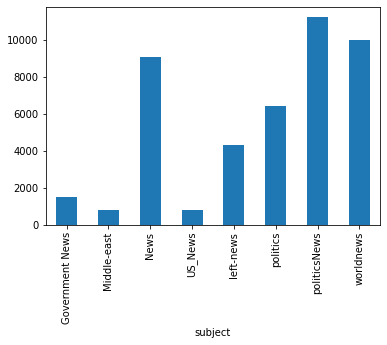

In [29]:
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

####  Distribution of Fake and Real articles

class
0    22840
1    21203
Name: text, dtype: int64


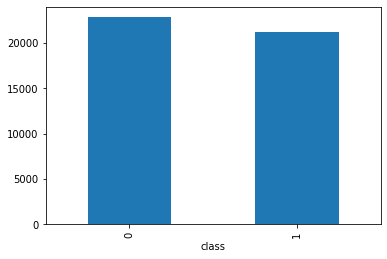

In [30]:
print(df.groupby(['class'])['text'].count())
df.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

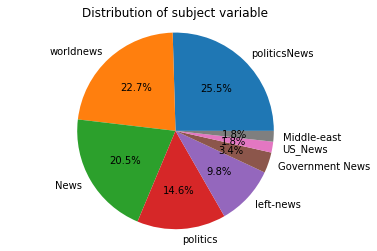

In [31]:
subject_counts = df["subject"].value_counts()

plt.pie(subject_counts, labels = subject_counts.index, autopct = "%1.1f%%")
plt.title("Distribution of subject variable")
plt.axis("equal")
plt.show()

<AxesSubplot:xlabel='subject', ylabel='Count'>

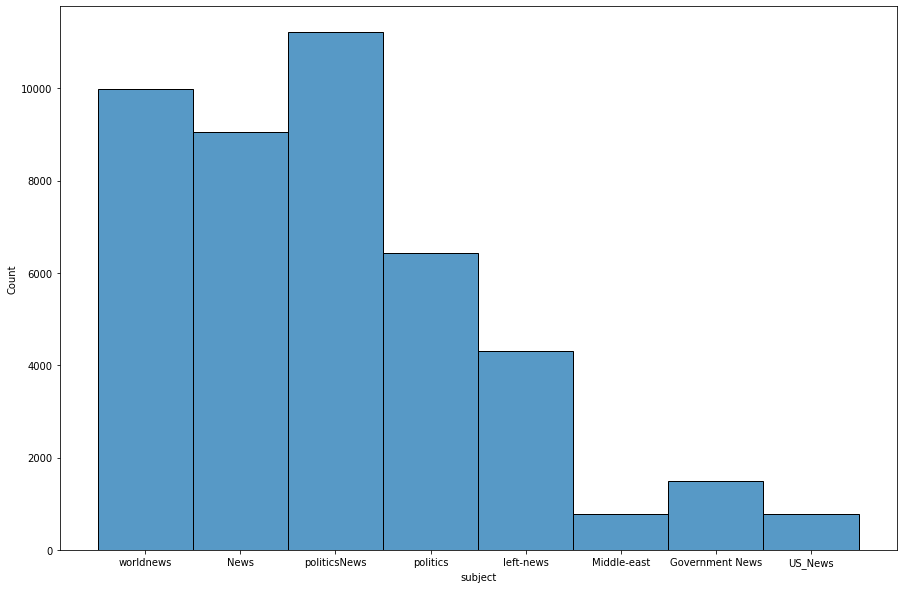

In [32]:
plt.figure(figsize = (15, 10))
sns.histplot(df["subject"])

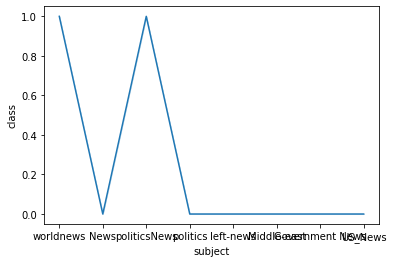

In [33]:
sns.lineplot(x="subject", y="class", data=df)
plt.show()

### Creating a function to process the texts 

In [35]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [36]:
df["text"] = df["text"].apply(wordopt)

### Model Building 

#### Defining dependent and independent variables 

In [37]:
x = data["text"]
y = data["class"]

#### Splitting Training and Testing 

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

#### Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [41]:
pred_lr=LR.predict(xv_test)

In [42]:
LR.score(xv_test, y_test)

0.9870824053452116

In [43]:
print("accuracy: {}%".format(round(accuracy_score(y_test, pred_lr)*100,2)))

accuracy: 98.71%


In [44]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5914
           1       0.98      0.99      0.99      5311

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



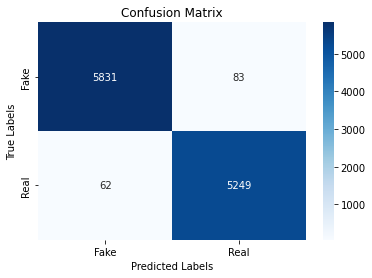

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Fake', 'Real'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fake', 'Real'])

plt.show()


### Manual Model Testing 

In [46]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    
    

    return print("\n\nLR Prediction: {} ".format(output_lable(pred_LR[0])))  
                                                                                                             

In [47]:
news = str(input())
manual_testing(news)

21416,Indonesia to buy $1.14 billion worth of Russian jets,"JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest eco

In [48]:
news = str(input())
manual_testing(news)

23471,Seven Iranians freed in the prisoner swap have not returned to Iran,"21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, wher

In [49]:
news = str(input())
manual_testing(news)

A powerful cyclone is hitting the coastlines of Bangladesh and Myanmar after intensifying into the equivalent of a category-five storm.  Cyclone Mocha is bringing heavy rain and winds of up to 195kph (120mph), which could see dangerous flooding on land around the Bay of Bengal.  Storm surges of up to four metres could swamp villages in low lying areas.  There are fears it may hit the world's largest refugee camp, Cox's Bazar, where nearly one million people live.  Forecasters warned Cyclone Mocha could be the most powerful storm seen in Bangladesh in nearly two decades and around 500,000 people have been evacuated to safer areas.  Heavy rain and driving winds began battering the region as the storm system moved to the coast, with reports of increasing disruption near the city of Sittwe, in Myanmar, from about 13:00 (07:00 GMT).  Electricity and wi-fi connections were disrupted across much of the Sittwe area, where videos show the tide rising dramatically and carrying debris down floode

In [50]:
news = str(input())
manual_testing(news)

The central bank has said it will withdraw ₹ 2,000 notes from circulation and people can exchange or deposit them in their bank accounts by September 30. The Reserve Bank of India's (RBI) 19 regional offices and other banks will start taking ₹ 2,000 notes for exchange with lower denomination one from May 23. They will remain legal tender, the RBI said.  The RBI has told all banks to stop issuing ₹ 2,000 notes immediately.  The RBI started printing the ₹ 2,000 note in November 2016 after Prime Minister Narendra Modi scrapped high-value ₹ 1,000 and ₹ 500 notes overnight.


LR Prediction: Not A Fake News 
